# Statistics review 13: Receiver operating characteristic

R code accompanying [paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1065080/pdf/cc3000.pdf)

## Key learning points

- Methods for assessing the performance of a diagnostic test
- Sensitivity, specificity and likelihood ratio of a test
- Receiver operating characteristic curve and the area under the curve

In [1]:
suppressPackageStartupMessages(library(tidyverse))

In [2]:
options(repr.plot.width=4, repr.plot.height=3)

## Data

In [6]:
died <- c(81, 45)
survived <- c(591, 674)

df1 <- data.frame(died=died, survived=survived,
                  row.names=c("Lactate >1.5 mmol/l", "Lactate ≤1.5 mmol/l"))
df1

,died,survived
Lactate >1.5 mmol/l,81,591
Lactate ≤1.5 mmol/l,45,674


### Data set with different prevalence

In [7]:
died <- c(386, 214)
survived <- c(370, 421)

df2 <- data.frame(died=died, survived=survived,
                  row.names=c("Lactate >1.5 mmol/l", "Lactate ≤1.5 mmol/l"))
df2

,died,survived
Lactate >1.5 mmol/l,386,370
Lactate ≤1.5 mmol/l,214,421


## Sensitivity and specificity

In [57]:
prop.ci <- function(p, n, alpha=0.05) {
    se <- sqrt(p*(1-p)/n)
    k <- qnorm(1 - alpha/2)
    round(c(p - k*se, p + k*se), 2)
}

In [72]:
sens <- function(tbl) {
    a <- tbl[1,1]
    b <- tbl[1,2]
    c <- tbl[2,1]
    d <- tbl[2,2]
    n <- a + c   
    p <- a/n
   
    round(p, 2)
}

In [73]:
sens(df1)

[1] 0.64

In [74]:
p <- sens(df1)
n <- sum(df1)
prop.ci(p, n)

[1] 0.61 0.67

In [75]:
spec <- function(tbl) {
    a <- tbl[1,1]
    b <- tbl[1,2]
    c <- tbl[2,1]
    d <- tbl[2,2]
    n <- b + d
    
    p <- d/n
    round(p, 2)
}

In [61]:
spec(df1)

[1] 0.53

## Positive and negative predictive values

In [64]:
ppv <- function(tbl) {
    a <- tbl[1,1]
    b <- tbl[1,2]
    c <- tbl[2,1]
    d <- tbl[2,2]
    n <- a + b
    p <- a/n
    
    round(p, 2)
}

In [65]:
ppv(df1)

[1] 0.12

In [66]:
npv <- function(tbl, alpha=0.05) {
    a <- tbl[1,1]
    b <- tbl[1,2]
    c <- tbl[2,1]
    d <- tbl[2,2]
    n <- c + d
    
    p <- d/n    
    round(p, 2)
}

In [67]:
npv(df1)

[1] 0.94

## Effect of prevalence

In [32]:
c(sens(df1)[1], sens(df2)[1])

[1] 0.64 0.64

In [33]:
c(spec(df1)[1], spec(df2)[1])

[1] 0.53 0.53

In [34]:
c(ppv(df1)[1], ppv(df2)[1])

[1] 0.12 0.51

In [35]:
c(npv(df1)[1], npv(df2)[1])

[1] 0.94 0.66

## Likelihood ratios

In [45]:
lr <- function(tbl) {
    round(sens(tbl)[1]/(1 - spec(tbl)[1]), 2)
}

In [46]:
lr(df1)

[1] 1.36

## Receiver operating characteristic curve (ROC) 

In [50]:
threshold <- c(0,1,1.5,2,3,5,25)
died <- c(126,114,81,58,37,19,0)
survived <- c(1265,996,591,329,131,27,0)

df3 <- data.frame(threshold=threshold, died=died, survived=survived)
df3

threshold,died,survived
0.0,126,1265
1.0,114,996
1.5,81,591
2.0,58,329
3.0,37,131
5.0,19,27
25.0,0,0


In [68]:
n.died <- 126
n.survived <- 1265

In [80]:
sens.1 <-function(died, ndied) {
    a <- died
    c <- ndied-died
    a/(a + c)
}

In [85]:
spec.1 <-function(survived, nsurvived) {
    b <- survived
    d <- nsurvived - survived
    b/(b+d)
}

In [110]:
df4 <- df3 %>% mutate(sens=sens.1(died, n.died), one.minus.spec=spec.1(survived, n.survived)) 
df4

threshold,died,survived,sens,one.minus.spec
0.0,126,1265,1.0000000,1.00000000
1.0,114,996,0.9047619,0.78735178
1.5,81,591,0.6428571,0.46719368
2.0,58,329,0.4603175,0.26007905
3.0,37,131,0.2936508,0.10355731
5.0,19,27,0.1507937,0.02134387
25.0,0,0,0.0000000,0.00000000


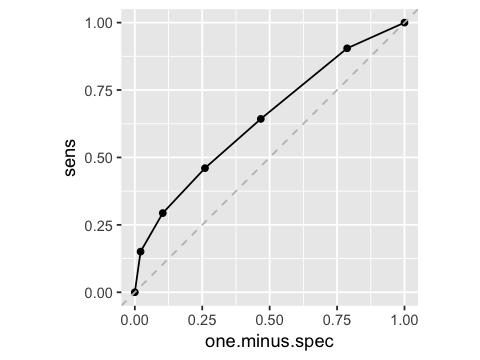

In [111]:
ggplot(df4, aes(x=one.minus.spec, y=sens)) + geom_point() + geom_line() +
geom_abline(intercept = 0, slope = 1, color='grey', linetype='dashed') +
coord_fixed()

### Area under the curve (AUCROC)

In [118]:
suppressPackageStartupMessages(require(pracma))

In [119]:
round(-1 * trapz(x=df4$one.minus.spec, y=df4$sens), 2)

[1] 0.64